In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#stock prices
apple_stocks = "Stock Prices/AAPL.csv"
amazon_stocks = "Stock Prices/AMZN.csv"
bankoa_stocks = "Stock Prices/BAC.csv"
verizon_stocks = "Stock Prices/VZ.csv"
#walmart_stocks = "Stock Prices/WMT.csv"
exxon_stocks = "Stock Prices/XOM.csv"

#sentiments
apple_sentiments = "Sentiments/apple_sentiments_final.csv"
amazon_sentiments = "Sentiments/Amazon_sentiments_final.csv"
bankoa_sentiments = "Sentiments/BofA__sentiments_final.csv"
verizon_sentiments = "Sentiments/verizon_final.csv"
#walmart_sentiments = "Sentiments/walmart_sentiments_final.csv"
exxon_sentiments = "Sentiments/exxon_final.csv"

In [3]:
#Prep Apple data
apple_sentiments_df = pd.read_csv(apple_sentiments)
num_articles = apple_sentiments_df.groupby('Date').count()['Sentiment']
max_sent = apple_sentiments_df.groupby('Date')['Sentiment'].max()
min_sent = apple_sentiments_df.groupby('Date')['Sentiment'].min()
avg_sent = apple_sentiments_df.groupby('Date')['Sentiment'].mean()

#Add columns to stocks data
apple_stocks_df = pd.read_csv(apple_stocks).set_index('Date')
apple_stocks_df['#articles'] = [x for x in num_articles]
apple_stocks_df['max sentiment'] = [x for x in max_sent]
apple_stocks_df['min sentiment'] = [x for x in min_sent]
apple_stocks_df['avg sentiment'] = [x for x in avg_sent]
apple_stocks_df['Company'] = "Apple"
apple_stocks_df = apple_stocks_df.drop(['Unnamed: 0'],axis=1)

In [4]:
apple_stocks_df

,Percent Change,#articles,max sentiment,min sentiment,avg sentiment,Company
Date,,,,,,
2018-12-20,-2.523,75,24.298611,-46.628652,-6.871510,Apple
2018-12-21,-3.890,56,25.409293,-26.548233,0.332852,Apple
2018-12-24,-2.587,22,43.905826,-23.410649,2.636682,Apple
2018-12-26,7.042,22,28.396645,-8.411769,6.306691,Apple
2018-12-27,-0.649,46,31.692428,-21.106106,0.120294,Apple
2018-12-28,0.051,38,29.220134,-19.359107,-0.237572,Apple
2018-12-31,0.967,20,41.259297,-8.645263,8.396772,Apple
2019-01-02,0.114,54,27.417663,-22.941304,0.242146,Apple
2019-01-03,-9.961,100,11.673601,-35.932426,-8.157143,Apple


In [5]:
#null hyp: news has no effect on stock prices
#alternative hyp: news has an effect on stock prices, -sentiment = - price change


In [6]:
apple_stocks_df['#articles'].map(sum)

TypeError: 'int' object is not iterable

In [16]:
pd.plotting.scatter_matrix( avg_sent, min_sent)

AttributeError: 'Series' object has no attribute 'columns'

TypeError: unsupported operand type(s) for +: 'float' and 'str'

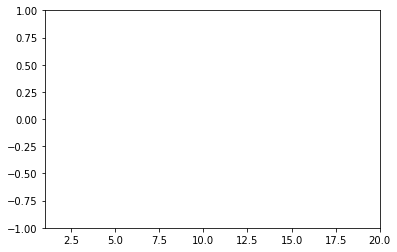

In [19]:
pd.plotting.autocorrelation_plot(np.array(apple_stocks_df), ax=None)